In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.io as sio

In [ ]:
mouse = 'F1497'
trace_path = '/content/gdrive/Shareddrives/Fleischmann Lab Group/Researchers/Shaun Kohli/Independent Study /Traces/' + mouse + '_FM_Trace.csv'
event_path = '/content/gdrive/Shareddrives/Fleischmann Lab Group/Researchers/Shaun Kohli/Independent Study /Traces/Events/' +mouse+ '_Events.csv'
aligned_path = '/content/gdrive/Shareddrives/Fleischmann Lab Group/Researchers/Shaun Kohli/Independent Study /Aligned Data/' + mouse +'_Aligned'
out_path = '/content/gdrive/Shareddrives/Fleischmann Lab Group/Researchers/Shaun Kohli/Independent Study /Place Cells/' + mouse + '_Place_Cells_new.png'
out_path2 = '/content/gdrive/Shareddrives/Fleischmann Lab Group/Researchers/Shaun Kohli/Independent Study /Aligned Data/Events/' + mouse +'_Aligned_Events_new'
nosepoke_times = sio.loadmat('/content/gdrive/Shareddrives/Fleischmann Lab Group/Researchers/Shaun Kohli/Independent Study /DLC/Nosepoke Timestamps/Timestamps.mat')
odor_order = [4, 5, 2, 4, 5, 2, 2, 3, 3, 2, 2, 5, 4, 3, 3, 4, 4, 2, 3, 4, 4, 2, 5, 3, 3, 4, 5, 5, 4, 5, 5, 3, 5, 2, 3, 4, 4, 2, 3, 5, 2, 4, 2, 5, 5, 3, 2, 3]
num_boxes = 200

In [ ]:
print(nosepoke_times.keys())

dict_keys(['__header__', '__version__', '__globals__', 'LEC_F1495_Context_LinearTrack_HED', 'LEC_F1496_Context_LinearTrack_HED', 'LEC_F1497_LinearTrack_HED', 'LEC_F1500_LinearTrack_HED', 'LEC_F1506_LinearTrack_HED', 'LEC_F1507_Context_LinearTrack_HED', 'LEC_F1507_LinearTrack_HED', 'aPC_F1498_Context_LinearTrack_HED', 'aPC_F1498_LinearTrack_HED', 'aPC_F1499_Context_LinearTrack_HED', 'aPC_F1499_LinearTrack_HED', 'aPC_F1509_LinearTrack_HED', 'aPC_F1514_LinearTrack_HED'])


In [ ]:
nosepoke = nosepoke_times['LEC_F1497_LinearTrack_HED'].squeeze()
print(nosepoke)

[  903  1200  1566  2144  2290  2597  2900  3295  3630  3923  4213  4498
  4928  5231  5629  6381  6783  7474  7954  9297  9631 10386 10700 11431
 11787 12360 12627 13409 13900 14441 14885 15739 16135 17675 18173 19423
 19661 20472 20742 21714 22023 22506 22837 24379 24734 27674 27856 28412]


In [ ]:
trace_frame = pd.read_csv(trace_path, header=[0,1], index_col=0)
trace_frame.columns = ['_'.join(col) for col in trace_frame.columns]
trace_frame = trace_frame[trace_frame.columns.drop(list(trace_frame.filter(regex='reject')))]
new_index = np.arange(0,trace_frame.index[-1]*100+5,5,dtype='int')
event_frame = pd.DataFrame(0,index=new_index,columns=trace_frame.columns)
event_frame

         C006_ accepted   C007_ accepted   C010_ accepted   C011_ accepted  \
0                     0                0                0                0   
5                     0                0                0                0   
10                    0                0                0                0   
15                    0                0                0                0   
20                    0                0                0                0   
...                 ...              ...              ...              ...   
152770                0                0                0                0   
152775                0                0                0                0   
152780                0                0                0                0   
152785                0                0                0                0   
152790                0                0                0                0   

         C012_ accepted   C013_ accepted   C014_ accepted   C01

In [ ]:
event_info_frame = pd.read_csv(event_path)
FM_events = event_info_frame[event_info_frame['Time (s)'] <= event_frame.index[-1]/100]
print(FM_events)

       Time (s)  Cell Name      Value
0          0.05       C006   5.919450
1         61.45       C006   9.257336
2         70.25       C006   5.301915
3         78.95       C006   5.685190
4         82.25       C006   6.181236
...         ...        ...        ...
35206   1289.45       C568  20.793900
35207   1322.05       C568  12.245050
35208   1328.50       C568  17.938760
35209   1339.25       C568  16.033050
35210   1472.85       C568  13.016770

[35211 rows x 3 columns]


In [ ]:
for index,event in FM_events.iterrows():
  time = int(round(event['Time (s)']*100))
  cell = event[' Cell Name'] + '_ accepted'
  event_frame[cell][time] = 1

In [ ]:
temp_frame = pd.DataFrame(event_frame.values,index=trace_frame.index,columns=trace_frame.columns)
print(temp_frame.sum().sum())
event_frame = temp_frame.iloc[nosepoke[0]-100:nosepoke[-1]+100]
event_frame

35211


C006_ accepted   C007_ accepted   C010_ accepted   C011_ accepted  \
40.15                  0                0                0                0   
40.20                  0                0                0                0   
40.25                  0                0                0                0   
40.30                  0                0                0                0   
40.35                  0                0                0                0   
...                  ...              ...              ...              ...   
1425.35                0                0                0                0   
1425.40                0                0                0                0   
1425.45                0                0                0                0   
1425.50                0                0                0                0   
1425.55                0                0                0                0   

          C012_ accepted   C013_ accepted   C014_ accepted   C015_ accepted  \
40.15                  0                0                0                0   
40.20                  0                0                0                0   
40.25                  0                0                0                0   
40.30                  0                0                0                0   
40.35                  0                0                0                0   
...                  ...              ...              ...              ...   
1425.35                0                0                0                0   
1425.40                0                0                0                0   
1425.45                0                0                0                0   
1425.50                0                0                0                0   
1425.55                0                0                0                0   

          C016_ accepted   C017_ accepted  ...   C546_ accepted  \
40.15                  0                0  ...                0   
40.20                  0                0  ...                0   
40.25                  0                0  ...                0   
40.30                  0                0  ...                0   
40.35                  0                0  ...                0   
...                  ...              ...  ...              ...   
1425.35                0                0  ...                0   
1425.40                0                0  ...                0   
1425.45                0                0  ...                0   
1425.50                0                0  ...                0   
1425.55                0                0  ...                0   

          C547_ accepted   C549_ accepted   C551_ accepted   C554_ accepted  \
40.15                  0                0                0                0   
40.20                  0                0                0                0   
40.25                  0                0                0                0   
40.30                  0                0                0                0   
40.35                  0                0                0                0   
...                  ...              ...              ...              ...   
1425.35                0                0                0                0   
1425.40                0                0                0                0   
1425.45                0                0                0                0   
1425.50                0                0                0                0   
1425.55                0                0                0                0   

          C557_ accepted   C560_ accepted   C562_ accepted   C566_ accepted  \
40.15                  0                0                0                0   
40.20                  0                0                0                0   
40.25                  0                0                0                0   
40.30                  0                0 

In [ ]:
aligned_frame = pd.read_csv(aligned_path,index_col=0,header=0)
position = aligned_frame['x'].values
hist,edges = np.histogram(position,num_boxes)
print(hist)

[ 106  877 2347 1476  549  239  164   67   43   39   53   36   70   31
   50   24   33   51   38   32   56   27   23   28   15   26   24   35
   31   36   11   13   31   22   13   12   12   22   18   21   15   18
   17   12   21   20   21   22   33   33   22   34   42   34   17   20
   17   14   10   20   17   14   18   13   11   18   14   19   24   15
   13   16   10   12   13   16   13    7   17   39   14   13   12   17
   10   26   25    9   15   14   15   16   15   14   13    7   16   17
   10   15   12   13    9   14   18    8   15   13   13   17    8   16
   11   17    8   14   20   11    7   17   22   17   35   19   50   37
   22   29   18   19   19   13   20   12   19   13   15   17    8   17
   21   24   20   32   16   23   16   15   22   16   10   18   18   15
   31   35   29   22   29   32   19   34   20   13   21   37   16   45
   20   25   15   22   19   30   28   27   23   25   32   45   31   71
   38   95   87   71   49   55  108  104  268  344  470 1158 2143 4442
 4943 

In [ ]:
windows = np.zeros([num_boxes,len(position)])
for i in range(num_boxes):
  series = aligned_frame['x']
  windows[i,:] = series.between(edges[i],edges[i+1]).map(int)
print(windows.shape)

(200, 27709)


In [ ]:
output = np.matmul(windows,event_frame.values)
idx = np.argwhere(np.all(output[..., :] == 0, axis=0))
output = np.delete(output, idx, axis=1)
brightest_window = np.zeros(output.shape[1])
for i in range(num_boxes):
  output[i] = output[i]/hist[i]
for j in range(output.shape[1]):
  brightest_window[j] = np.argmax(output[:,j])
  brightness = np.max(output[:,j])
  output[:,j] = output[:,j]/brightness
order = np.argsort(brightest_window)
output= output[:,order]

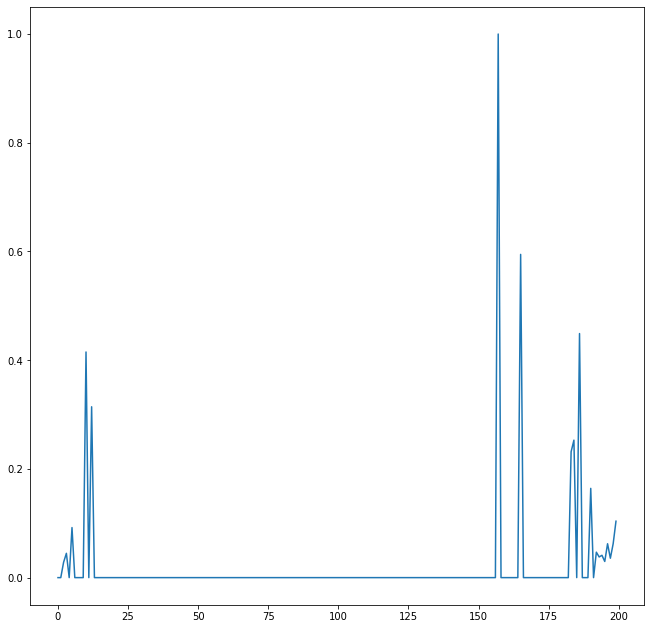

In [ ]:
plt.plot(output[:,203])
plt.savefig('/content/gdrive/Shareddrives/Fleischmann Lab Group/Researchers/Shaun Kohli/Independent Study /Place Cells/for_alex1.jpeg',dpi=600)

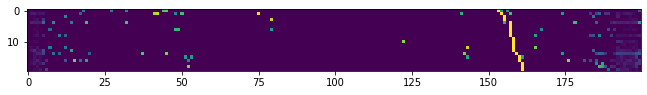

In [ ]:
plt.rcParams["figure.figsize"] = (11,11)
plt.imshow(output.T)
plt.imsave('/content/gdrive/Shareddrives/Fleischmann Lab Group/Researchers/Shaun Kohli/Independent Study /Place Cells/for_alex3.jpeg',output[:,195:215].T,dpi=600)

In [ ]:
regressor_cols = aligned_frame.iloc[:,-13:]
regressor_cols.reset_index(0,inplace=True)
event_frame.reset_index(0,inplace=True)
output2 = pd.concat([event_frame,regressor_cols],axis=1)
output2.drop(['index'],1,inplace=True)
output2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


C001_ accepted   C003_ accepted   C004_ accepted   C005_ accepted  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
34699                0                0                0                0   
34700                0                0                0                0   
34701                0                0                0                0   
34702                0                0                0                0   
34703                0                0                0                0   

        C006_ accepted   C007_ accepted   C008_ accepted   C011_ accepted  \
0                    0                0                0                0   
1                    0                0                0                0   
2                    0                0                0                0   
3                    0                0                0                0   
4                    0                0                0                0   
...                ...              ...              ...              ...   
34699                0                0                0                0   
34700                0                0                0                0   
34701                0                0                0                0   
34702                0                0                0                0   
34703                0                0                0                0   

        C012_ accepted   C013_ accepted  ...  velocity   turning  poke_index  \
0                    0                0  ...  6.980984  0.481623         0.0   
1                    0                0  ...  7.092660  0.478509         0.0   
2                    0                0  ...  6.832423  0.513968         0.0   
3                    0                0  ...  6.277703  0.482365         0.0   
4                    0                0  ...  6.036129  0.466415         0.0   
...                ...              ...  ...       ...       ...         ...   
34699                0                0  ...  1.038992 -0.208772         0.0   
34700                0                0  ...  1.051858 -0.175373         0.0   
34701                0                0  ...  1.063597 -0.104348         0.0   
34702                0                0  ...  1.117730  0.097396         0.0   
34703                0                0  ...  1.045974  0.146713         0.0   

       prepoke_window  odor_exposure_window  Empty_bottle_window  \
0                 0.0                   0.0                  0.0   
1                 0.0                   0.0                  0.0   
2                 0.0                   0.0                  0.0   
3                 0.0                   0.0                  0.0   
4                 0.0                   0.0                  0.0   
...               ...                   ...                  ...   
34699             0.0                   0.0                  0.0   
34700             0.0                   0.0                  0.0   
34701             0.0                   0.0                  0.0   
34702             0.0                   0.0                  0.0   
34703             0.0                   0.0                  0.0   

       Hexanal_window  Ethyl_butyrate_window  Limonene_window  reward_window  
0                 0.0                    0.0              0.0            0.0  
1                 0.0                    0.0              0.0            0.0  
2                 0.0                    0.0              0.0            0.0  
3                 0.0                    0.0              0.0   

In [ ]:
output2.to_csv(out_path2)